<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-classic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Time Series data: Classic Machine Learning

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html



In [0]:
import pandas as pd
import numpy as np

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
plt.style.use('ggplot')

In [0]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

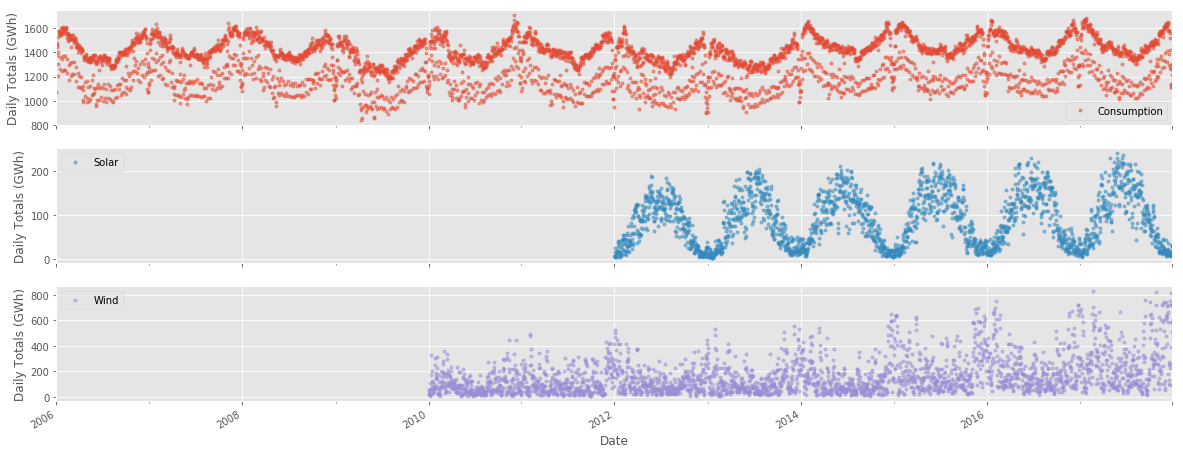

In [4]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 8), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

## Classic Models

In [0]:
y = time_series_df['2016-12': '2017-2']['Consumption'].to_numpy()

In [6]:
y.shape

(90,)

In [0]:
X = np.arange(len(y)).reshape(-1, 1)

In [8]:
X.shape

(90, 1)

In [9]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor(tol=None, max_iter=10000)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [10]:
est.score(X, y)

-2.6336225969253557

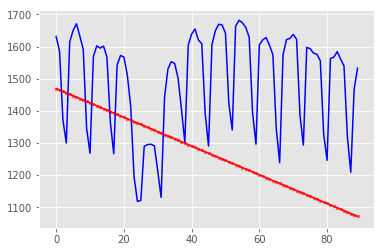

In [11]:
plt.plot(X, y, color='blue')

# we can either plot using line parameters 
a = est.coef_; b = est.intercept_
lreg = a*X + b
plt.plot(X, lreg, c='red')

# or plot predicted points
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red');

In [0]:
from sklearn.svm import SVR

In [13]:
%%time

svr_lin = SVR(kernel='linear', C=1e4)
y_lin = svr_lin.fit(X, y).predict(X)

CPU times: user 1.43 s, sys: 28.8 ms, total: 1.46 s
Wall time: 1.45 s


In [14]:
svr_lin.score(X, y)

-0.236278875385578

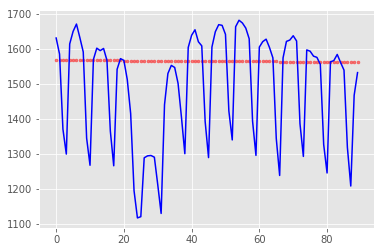

In [15]:
plt.plot(X, y, color='blue')
plt.scatter(X, y_lin, marker='.', alpha=0.5, color='red')

In [16]:
%%time

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

CPU times: user 35.5 ms, sys: 29.9 ms, total: 65.4 ms
Wall time: 36.9 ms


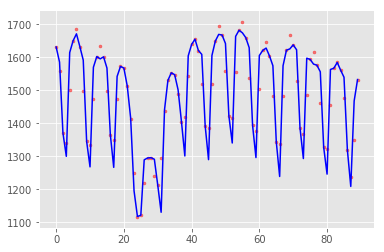

In [17]:
plt.plot(X, y, color='blue')
plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

In [18]:
svr_rbf.score(X, y)

0.8688596891435212

CPU times: user 20.6 ms, sys: 5.63 ms, total: 26.3 ms
Wall time: 25.6 ms


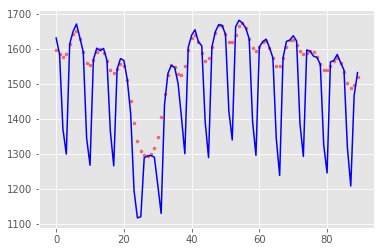

In [19]:
%%time

# regularize a bit
svr_rbf = SVR(kernel='rbf', C=50, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)
plt.plot(X, y, color='blue')
plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

In [0]:
# does not terminate within any reasonable amount of time
# %%time 

# svr_poly = SVR(kernel='poly', C=1e4, max_iter=1000)
# y_poly = svr_poly.fit(X, y).predict(X)

### Evaluation

In [21]:
y_test = time_series_df['2017-2': '2017-3']['Consumption'].to_numpy()
y_test.shape

(59,)

In [22]:
X_test = np.arange(len(y), len(y) + len(y_test)).reshape(-1, 1)
X_test.shape

(59, 1)

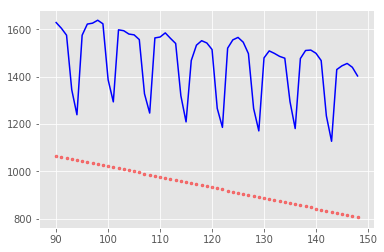

In [23]:
plt.plot(X_test, y_test, color='blue')

y_test_pred = est.predict(X_test)
plt.scatter(X_test, y_test_pred, marker='.', alpha=0.5, color='red')

In [24]:
est.score(X_test, y_test)

-14.136634483713665

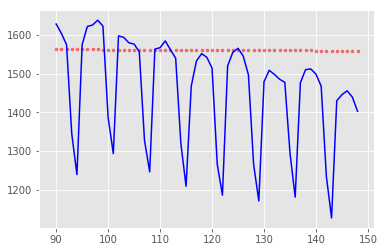

In [25]:
plt.plot(X_test, y_test, color='blue')

y_lin = svr_lin.predict(X_test)

plt.scatter(X_test, y_lin, marker='.', alpha=0.5, color='red')

In [26]:
svr_lin.score(X_test, y_test)

-0.5385690425898566

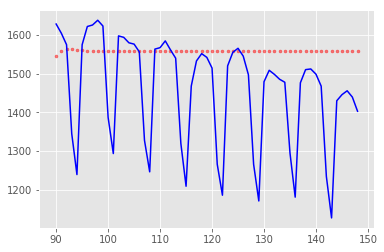

In [27]:
plt.plot(X_test, y_test, color='blue')

y_rbf = svr_rbf.predict(X_test)

plt.scatter(X_test, y_rbf, marker='.', alpha=0.5, color='red')

In [28]:
svr_rbf.score(X_test, y_test)

-0.5262025300370761